# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [50]:
# Dependencies and Setup
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

sys.path.append("python-api-challenge/WeatherPy")
sys.path.append("python-api-challenge/WeatherPy/citipy")

import api_keys

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [51]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [52]:

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

responses = []

# loop through cities list calling weather API each time
for city in cities:
    query_url = f'{url}appid={weather_api_key}&q={city}'
    # Get weather data
    weather_response = requests.get(query_url).json()
    print(weather_response)
    #add responses to list
    responses.append(weather_response)
    # print log of each city as its bering procesed City number and name 
    print(f'Retrieving Record of {city}')




{'coord': {'lon': 44.24, 'lat': 65.85}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 273.19, 'feels_like': 267.45, 'temp_min': 273.19, 'temp_max': 273.19, 'pressure': 1027, 'humidity': 96, 'sea_level': 1027, 'grnd_level': 1025}, 'visibility': 10000, 'wind': {'speed': 5.26, 'deg': 188}, 'clouds': {'all': 100}, 'dt': 1606762387, 'sys': {'country': 'RU', 'sunrise': 1606718670, 'sunset': 1606733969}, 'timezone': 10800, 'id': 527321, 'name': "Mezen'", 'cod': 200}
Retrieving Record of mezen
{'coord': {'lon': 30.79, 'lat': 59.7}, 'weather': [{'id': 620, 'main': 'Snow', 'description': 'light shower snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 273.15, 'feels_like': 268.92, 'temp_min': 273.15, 'temp_max': 273.15, 'pressure': 1019, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 160}, 'clouds': {'all': 90}, 'dt': 1606762387, 'sys': {'type': 1, 'id': 8926, 'country': 'RU', 'sunris

{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 297.31, 'feels_like': 297.76, 'temp_min': 297.31, 'temp_max': 297.31, 'pressure': 1021, 'humidity': 76, 'sea_level': 1021, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 4.4, 'deg': 80}, 'clouds': {'all': 0}, 'dt': 1606762391, 'sys': {'country': 'PF', 'sunrise': 1606745147, 'sunset': 1606793535}, 'timezone': -32400, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
Retrieving Record of rikitea
{'coord': {'lon': 167.48, 'lat': -22.67}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 295.85, 'feels_like': 294.22, 'temp_min': 295.85, 'temp_max': 295.85, 'pressure': 1015, 'humidity': 64, 'sea_level': 1015, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 4.92, 'deg': 86}, 'clouds': {'all': 0}, 'dt': 1606762391, 'sys': {'country': 'NC

{'coord': {'lon': 147.33, 'lat': -42.88}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 289.04, 'feels_like': 284.56, 'temp_min': 288.15, 'temp_max': 290.15, 'pressure': 1002, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 20}, 'clouds': {'all': 100}, 'dt': 1606762354, 'sys': {'type': 1, 'id': 9545, 'country': 'AU', 'sunrise': 1606760842, 'sunset': 1606815145}, 'timezone': 39600, 'id': 2163355, 'name': 'Hobart', 'cod': 200}
Retrieving Record of hobart
{'coord': {'lon': 26.89, 'lat': -33.59}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 291.13, 'feels_like': 288.26, 'temp_min': 291.13, 'temp_max': 291.13, 'pressure': 1013, 'humidity': 75, 'sea_level': 1013, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 5.65, 'deg': 258}, 'clouds': {'all': 26}, 'dt': 1606762394, 'sys': {'country': 'ZA',

{'coord': {'lon': 50.81, 'lat': 9.49}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 297.83, 'feels_like': 297.39, 'temp_min': 297.83, 'temp_max': 297.83, 'pressure': 1014, 'humidity': 74, 'sea_level': 1014, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 5.72, 'deg': 29}, 'clouds': {'all': 0}, 'dt': 1606762398, 'sys': {'country': 'SO', 'sunrise': 1606703839, 'sunset': 1606745645}, 'timezone': 10800, 'id': 64814, 'name': 'Bandarbeyla', 'cod': 200}
Retrieving Record of bandarbeyla
{'coord': {'lon': -169.92, 'lat': -19.06}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 295.15, 'feels_like': 299.5, 'temp_min': 295.15, 'temp_max': 295.15, 'pressure': 1013, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 0.5, 'deg': 130}, 'clouds': {'all': 75}, 'dt': 1606762398, 'sys': {'type': 1, 'id': 7306, 'country': 'NU', 'sun

{'coord': {'lon': 96.92, 'lat': 56.15}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 262.06, 'feels_like': 255.64, 'temp_min': 262.06, 'temp_max': 262.06, 'pressure': 1042, 'humidity': 93, 'sea_level': 1042, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 261}, 'clouds': {'all': 100}, 'dt': 1606762402, 'sys': {'country': 'RU', 'sunrise': 1606786822, 'sunset': 1606813368}, 'timezone': 25200, 'id': 1489571, 'name': 'Tinskoy', 'cod': 200}
Retrieving Record of tinskoy
{'cod': '404', 'message': 'city not found'}
Retrieving Record of belushya guba
{'coord': {'lon': -51.99, 'lat': -6.64}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 305.15, 'feels_like': 307.95, 'temp_min': 305.15, 'temp_max': 305.15, 'pressure': 1008, 'humidity': 49, 'sea_level': 1008, 'grnd_level': 985}, 'visibility': 10000, 'wind':

{'coord': {'lon': -65.1, 'lat': -43.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 299.85, 'feels_like': 294.53, 'temp_min': 299.85, 'temp_max': 299.85, 'pressure': 1007, 'humidity': 17, 'sea_level': 1007, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 4.68, 'deg': 259}, 'clouds': {'all': 0}, 'dt': 1606762405, 'sys': {'country': 'AR', 'sunrise': 1606725350, 'sunset': 1606779785}, 'timezone': -10800, 'id': 3839307, 'name': 'Rawson', 'cod': 200}
Retrieving Record of rawson
{'coord': {'lon': 80.55, 'lat': 73.51}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 272.44, 'feels_like': 264.31, 'temp_min': 272.44, 'temp_max': 272.44, 'pressure': 1004, 'humidity': 99, 'sea_level': 1004, 'grnd_level': 998}, 'visibility': 1409, 'wind': {'speed': 8.6, 'deg': 272}, 'snow': {'1h': 0.25}, 'clouds': {'all': 100}, 'dt': 1606762405, 'sys'

{'coord': {'lon': -73.65, 'lat': -37.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 286.93, 'feels_like': 279.18, 'temp_min': 286.93, 'temp_max': 286.93, 'pressure': 1017, 'humidity': 67, 'sea_level': 1017, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 10.32, 'deg': 192}, 'clouds': {'all': 0}, 'dt': 1606762409, 'sys': {'country': 'CL', 'sunrise': 1606728438, 'sunset': 1606780803}, 'timezone': -10800, 'id': 3883457, 'name': 'Lebu', 'cod': 200}
Retrieving Record of lebu
{'coord': {'lon': -52.73, 'lat': 47.67}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 276.46, 'feels_like': 269.4, 'temp_min': 275.93, 'temp_max': 277.04, 'pressure': 1029, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 290}, 'clouds': {'all': 5}, 'dt': 1606762409, 'sys': {'type': 1, 'id': 998, 'country': 'CA', 'sunrise': 160673387

{'coord': {'lon': 18.42, 'lat': -33.93}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 289.89, 'feels_like': 288.55, 'temp_min': 289.82, 'temp_max': 290.15, 'pressure': 1016, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 300}, 'clouds': {'all': 75}, 'dt': 1606761845, 'sys': {'type': 1, 'id': 1899, 'country': 'ZA', 'sunrise': 1606706921, 'sunset': 1606758115}, 'timezone': 7200, 'id': 3369157, 'name': 'Cape Town', 'cod': 200}
Retrieving Record of cape town
{'coord': {'lon': -24.5, 'lat': 14.9}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 296.99, 'feels_like': 296.5, 'temp_min': 296.99, 'temp_max': 296.99, 'pressure': 1013, 'humidity': 67, 'sea_level': 1013, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 4.29, 'deg': 58}, 'clouds': {'all': 100}, 'dt': 1606762413, 'sys': {'country': 'CV', '

{'coord': {'lon': -50.01, 'lat': -24.79}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 294.84, 'feels_like': 294.92, 'temp_min': 294.84, 'temp_max': 294.84, 'pressure': 1012, 'humidity': 78, 'sea_level': 1012, 'grnd_level': 903}, 'visibility': 10000, 'wind': {'speed': 3.69, 'deg': 223}, 'clouds': {'all': 100}, 'dt': 1606762416, 'sys': {'country': 'BR', 'sunrise': 1606724558, 'sunset': 1606773333}, 'timezone': -10800, 'id': 3466704, 'name': 'Castro', 'cod': 200}
Retrieving Record of castro
{'coord': {'lon': 59.22, 'lat': 32.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 283.15, 'feels_like': 278.23, 'temp_min': 283.15, 'temp_max': 283.15, 'pressure': 1022, 'humidity': 31}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 100}, 'clouds': {'all': 0}, 'dt': 1606762416, 'sys': {'type': 1, 'id': 7481, 'country': 'IR', 'sunrise

{'coord': {'lon': 177.48, 'lat': 64.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 248.6, 'feels_like': 244.11, 'temp_min': 248.15, 'temp_max': 249.15, 'pressure': 1006, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 360, 'gust': 3}, 'clouds': {'all': 0}, 'dt': 1606762420, 'sys': {'type': 1, 'id': 8872, 'country': 'RU', 'sunrise': 1606772168, 'sunset': 1606789343}, 'timezone': 43200, 'id': 2127202, 'name': 'Anadyr', 'cod': 200}
Retrieving Record of anadyr
{'coord': {'lon': -10.07, 'lat': 20.5}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.92, 'feels_like': 294.22, 'temp_min': 297.92, 'temp_max': 297.92, 'pressure': 1014, 'humidity': 19, 'sea_level': 1014, 'grnd_level': 970}, 'visibility': 10000, 'wind': {'speed': 2.36, 'deg': 158}, 'clouds': {'all': 97}, 'dt': 1606762420, 'sys': {'country': 'MR', 'su

{'cod': '404', 'message': 'city not found'}
Retrieving Record of mys shmidta
{'coord': {'lon': -124.16, 'lat': 40.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 283.32, 'feels_like': 281.91, 'temp_min': 282.59, 'temp_max': 283.71, 'pressure': 1027, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 319, 'gust': 0.89}, 'clouds': {'all': 100}, 'dt': 1606762424, 'sys': {'type': 3, 'id': 2008778, 'country': 'US', 'sunrise': 1606749650, 'sunset': 1606783841}, 'timezone': -28800, 'id': 5563839, 'name': 'Fortuna', 'cod': 200}
Retrieving Record of fortuna
{'coord': {'lon': 73.07, 'lat': 6.62}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 301.17, 'feels_like': 303.93, 'temp_min': 301.17, 'temp_max': 301.17, 'pressure': 1012, 'humidity': 77, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind'

{'coord': {'lon': 69.58, 'lat': 24.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 295.1, 'feels_like': 294.05, 'temp_min': 295.1, 'temp_max': 295.1, 'pressure': 1015, 'humidity': 38, 'sea_level': 1015, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 0.5, 'deg': 279}, 'clouds': {'all': 0}, 'dt': 1606762427, 'sys': {'country': 'PK', 'sunrise': 1606700899, 'sunset': 1606739573}, 'timezone': 18000, 'id': 1179758, 'name': 'Diplo', 'cod': 200}
Retrieving Record of diplo
{'coord': {'lon': 57.66, 'lat': -20.01}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 298.71, 'feels_like': 302.29, 'temp_min': 298.71, 'temp_max': 298.71, 'pressure': 1015, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 98, 'gust': 5.36}, 'clouds': {'all': 1}, 'dt': 1606762427, 'sys': {'type': 3, 'id': 2002134, 'country': 'MU', 'sunris

{'coord': {'lon': 129.55, 'lat': -14.25}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 301.14, 'feels_like': 306.11, 'temp_min': 301.14, 'temp_max': 301.14, 'pressure': 1007, 'humidity': 82, 'sea_level': 1007, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 1.74, 'deg': 309}, 'clouds': {'all': 78}, 'dt': 1606762430, 'sys': {'country': 'AU', 'sunrise': 1606769039, 'sunset': 1606815485}, 'timezone': 34200, 'id': 2063039, 'name': 'Port Keats', 'cod': 200}
Retrieving Record of port keats
{'cod': '404', 'message': 'city not found'}
Retrieving Record of attawapiskat
{'coord': {'lon': 125.41, 'lat': -8.93}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 289.57, 'feels_like': 291.38, 'temp_min': 289.57, 'temp_max': 289.57, 'pressure': 1008, 'humidity': 100, 'sea_level': 1008, 'grnd_level': 853}, 'visibility': 10000, 'w

{'coord': {'lon': 25.57, 'lat': -33.92}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 290.15, 'feels_like': 287.04, 'temp_min': 290.15, 'temp_max': 290.15, 'pressure': 1012, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 240}, 'clouds': {'all': 20}, 'dt': 1606762434, 'sys': {'type': 1, 'id': 1973, 'country': 'ZA', 'sunrise': 1606705206, 'sunset': 1606756396}, 'timezone': 7200, 'id': 964420, 'name': 'Port Elizabeth', 'cod': 200}
Retrieving Record of port elizabeth
{'coord': {'lon': 114.16, 'lat': 22.29}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 290.15, 'feels_like': 290.36, 'temp_min': 285.37, 'temp_max': 292.04, 'pressure': 1023, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 337, 'gust': 0.89}, 'clouds': {'all': 0}, 'dt': 1606762333, 'sys': {'type': 3, 'id': 2035800, 'country': 'HK',

{'cod': '404', 'message': 'city not found'}
Retrieving Record of meyungs
{'coord': {'lon': 119.7, 'lat': 49.2}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 256.13, 'feels_like': 250.11, 'temp_min': 256.13, 'temp_max': 256.13, 'pressure': 1038, 'humidity': 93, 'sea_level': 1038, 'grnd_level': 956}, 'visibility': 10000, 'wind': {'speed': 3.59, 'deg': 238}, 'clouds': {'all': 55}, 'dt': 1606762438, 'sys': {'country': 'CN', 'sunrise': 1606779291, 'sunset': 1606809962}, 'timezone': 28800, 'id': 2037078, 'name': 'Hailar', 'cod': 200}
Retrieving Record of hailar
{'coord': {'lon': -59.65, 'lat': -29.15}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 302.07, 'feels_like': 303.3, 'temp_min': 302.07, 'temp_max': 302.07, 'pressure': 1013, 'humidity': 58, 'sea_level': 1013, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 3

{'coord': {'lon': 124.29, 'lat': 8}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.15, 'feels_like': 303.01, 'temp_min': 298.15, 'temp_max': 298.15, 'pressure': 1008, 'humidity': 91}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 249, 'gust': 2.24}, 'clouds': {'all': 87}, 'dt': 1606762443, 'sys': {'type': 3, 'id': 2007154, 'country': 'PH', 'sunrise': 1606772482, 'sunset': 1606814567}, 'timezone': 28800, 'id': 1701054, 'name': 'Marawi', 'cod': 200}
Retrieving Record of marawi
{'coord': {'lon': -1.76, 'lat': 4.88}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 299.74, 'feels_like': 303.31, 'temp_min': 299.74, 'temp_max': 299.74, 'pressure': 1011, 'humidity': 82, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 206}, 'clouds': {'all': 24}, 'dt': 1606762443, 'sys': {'country': '

{'coord': {'lon': -122.43, 'lat': 37.46}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 286.4, 'feels_like': 284.49, 'temp_min': 284.15, 'temp_max': 288.15, 'pressure': 1026, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 300}, 'clouds': {'all': 1}, 'dt': 1606762447, 'sys': {'type': 1, 'id': 4322, 'country': 'US', 'sunrise': 1606748723, 'sunset': 1606783937}, 'timezone': -28800, 'id': 5354943, 'name': 'Half Moon Bay', 'cod': 200}
Retrieving Record of half moon bay
{'coord': {'lon': -42.7, 'lat': -9.02}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 304.23, 'feels_like': 304.74, 'temp_min': 304.23, 'temp_max': 304.23, 'pressure': 1009, 'humidity': 41, 'sea_level': 1009, 'grnd_level': 972}, 'visibility': 10000, 'wind': {'speed': 2.25, 'deg': 126}, 'clouds': {'all': 100}, 'dt': 1606762447, 'sys': {'country': '

{'coord': {'lon': -53.26, 'lat': 47.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 276.67, 'feels_like': 269.64, 'temp_min': 275.93, 'temp_max': 277.59, 'pressure': 1029, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 290}, 'clouds': {'all': 5}, 'dt': 1606762450, 'sys': {'type': 1, 'id': 998, 'country': 'CA', 'sunrise': 1606733988, 'sunset': 1606765463}, 'timezone': -12600, 'id': 5895424, 'name': 'Bay Roberts', 'cod': 200}
Retrieving Record of bay roberts
{'coord': {'lon': 34.76, 'lat': 31.61}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 288.01, 'feels_like': 286.97, 'temp_min': 285.37, 'temp_max': 290.15, 'pressure': 1015, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 0}, 'clouds': {'all': 20}, 'dt': 1606762451, 'sys': {'type': 1, 'id': 6845, 'country': 'IL', 'sunrise': 1606710138, 's

{'cod': '404', 'message': 'city not found'}
Retrieving Record of nizhneyansk
{'coord': {'lon': -157.84, 'lat': 21.44}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 297.15, 'feels_like': 297.75, 'temp_min': 295.37, 'temp_max': 300.15, 'pressure': 1016, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 70}, 'clouds': {'all': 75}, 'dt': 1606762454, 'sys': {'type': 1, 'id': 7877, 'country': 'US', 'sunrise': 1606755165, 'sunset': 1606794497}, 'timezone': -36000, 'id': 5856516, 'name': '‘Āhuimanu', 'cod': 200}
Retrieving Record of ahuimanu
{'coord': {'lon': 126.58, 'lat': 7.45}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 298.31, 'feels_like': 300.87, 'temp_min': 298.31, 'temp_max': 298.31, 'pressure': 1007, 'humidity': 79, 'sea_level': 1007, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 2.51,

{'coord': {'lon': 12.08, 'lat': 57.49}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}, {'id': 301, 'main': 'Drizzle', 'description': 'drizzle', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 276.48, 'feels_like': 270.77, 'temp_min': 274.15, 'temp_max': 278.15, 'pressure': 1012, 'humidity': 89}, 'visibility': 6000, 'wind': {'speed': 5.7, 'deg': 160}, 'rain': {'1h': 0.24}, 'clouds': {'all': 90}, 'dt': 1606762458, 'sys': {'type': 1, 'id': 1746, 'country': 'SE', 'sunrise': 1606721215, 'sunset': 1606746865}, 'timezone': 3600, 'id': 2698729, 'name': 'Kungsbacka', 'cod': 200}
Retrieving Record of kungsbacka
{'coord': {'lon': -137.51, 'lat': 60.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 252.15, 'feels_like': 247.76, 'temp_min': 252.15, 'temp_max': 252.15, 'pressure': 1005, 'humidity': 83, 'sea_level': 1005, 'grnd_level': 930}, 'visibility': 1036, 'wind': {'sp

{'cod': '404', 'message': 'city not found'}
Retrieving Record of guelengdeng
{'coord': {'lon': 67.8, 'lat': 66.56}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 263.5, 'feels_like': 255.77, 'temp_min': 263.5, 'temp_max': 263.5, 'pressure': 1033, 'humidity': 94, 'sea_level': 1033, 'grnd_level': 1029}, 'visibility': 10000, 'wind': {'speed': 6.63, 'deg': 243}, 'clouds': {'all': 32}, 'dt': 1606762461, 'sys': {'country': 'RU', 'sunrise': 1606713798, 'sunset': 1606727529}, 'timezone': 18000, 'id': 1512019, 'name': 'Aksarka', 'cod': 200}
Retrieving Record of aksarka
{'coord': {'lon': -7.35, 'lat': 4.42}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 299.22, 'feels_like': 302.49, 'temp_min': 299.22, 'temp_max': 299.22, 'pressure': 1011, 'humidity': 82, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2

{'coord': {'lon': 69.23, 'lat': 55.64}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 253.33, 'feels_like': 249.33, 'temp_min': 253.33, 'temp_max': 253.33, 'pressure': 1054, 'humidity': 91, 'sea_level': 1054, 'grnd_level': 1041}, 'visibility': 10000, 'wind': {'speed': 0.55, 'deg': 203}, 'clouds': {'all': 0}, 'dt': 1606762464, 'sys': {'country': 'RU', 'sunrise': 1606706794, 'sunset': 1606733847}, 'timezone': 18000, 'id': 1504019, 'name': 'Kazanskoye', 'cod': 200}
Retrieving Record of kazanskoye
{'coord': {'lon': -99.89, 'lat': 16.86}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 304.15, 'feels_like': 307.14, 'temp_min': 304.15, 'temp_max': 304.15, 'pressure': 1013, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 190}, 'clouds': {'all': 20}, 'dt': 1606762219, 'sys': {'type': 1, 'id': 7103, 'country': 'MX', 'sunris

{'coord': {'lon': -50.21, 'lat': -30.18}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 295.21, 'feels_like': 294.98, 'temp_min': 295.21, 'temp_max': 295.21, 'pressure': 1015, 'humidity': 81, 'sea_level': 1015, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 4.72, 'deg': 170}, 'clouds': {'all': 100}, 'dt': 1606762468, 'sys': {'country': 'BR', 'sunrise': 1606723920, 'sunset': 1606774066}, 'timezone': -10800, 'id': 3466165, 'name': 'Cidreira', 'cod': 200}
Retrieving Record of cidreira
{'coord': {'lon': 122.53, 'lat': -4.94}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 298.34, 'feels_like': 302.67, 'temp_min': 298.34, 'temp_max': 298.34, 'pressure': 1008, 'humidity': 85, 'sea_level': 1008, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 0.9, 'deg': 297}, 'rain': {'1h': 0.562}, 'clouds': {'all': 100}, 'dt':

{'coord': {'lon': 76.26, 'lat': 9.94}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 300.15, 'feels_like': 303.95, 'temp_min': 300.15, 'temp_max': 300.15, 'pressure': 1011, 'humidity': 83}, 'visibility': 4000, 'wind': {'speed': 2.77, 'deg': 83}, 'rain': {'1h': 0.18}, 'clouds': {'all': 20}, 'dt': 1606762471, 'sys': {'type': 1, 'id': 9211, 'country': 'IN', 'sunrise': 1606784203, 'sunset': 1606825907}, 'timezone': 19800, 'id': 1273874, 'name': 'Kochi', 'cod': 200}
Retrieving Record of kochi
{'coord': {'lon': 102.35, 'lat': -0.32}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 296.72, 'feels_like': 301.43, 'temp_min': 296.72, 'temp_max': 296.72, 'pressure': 1010, 'humidity': 95, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 0.54, 'de

{'coord': {'lon': 113.03, 'lat': 3.17}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 297.09, 'feels_like': 301.1, 'temp_min': 297.04, 'temp_max': 297.15, 'pressure': 1009, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 1.69, 'deg': 164}, 'clouds': {'all': 20}, 'dt': 1606762475, 'sys': {'type': 1, 'id': 9365, 'country': 'MY', 'sunrise': 1606774718, 'sunset': 1606817738}, 'timezone': 28800, 'id': 1737486, 'name': 'Bintulu', 'cod': 200}
Retrieving Record of bintulu
{'coord': {'lon': 121.97, 'lat': 20.45}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 297.35, 'feels_like': 290.84, 'temp_min': 297.35, 'temp_max': 297.35, 'pressure': 1017, 'humidity': 72, 'sea_level': 1017, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 13.8, 'deg': 48}, 'clouds': {'all': 29}, 'dt': 1606762475, 'sys': {'country': 'PH', 'sunr

{'coord': {'lon': -1.98, 'lat': 43.27}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 285.18, 'feels_like': 284.86, 'temp_min': 284.82, 'temp_max': 285.37, 'pressure': 1026, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 0.5, 'deg': 0}, 'clouds': {'all': 75}, 'dt': 1606762278, 'sys': {'type': 1, 'id': 6431, 'country': 'ES', 'sunrise': 1606720783, 'sunset': 1606754047}, 'timezone': 3600, 'id': 3120811, 'name': 'Hernani', 'cod': 200}
Retrieving Record of hernani
{'coord': {'lon': 141.97, 'lat': -38.27}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 294.6, 'feels_like': 288.55, 'temp_min': 294.6, 'temp_max': 294.6, 'pressure': 1000, 'humidity': 36, 'sea_level': 1000, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 7.26, 'deg': 348}, 'rain': {'1h': 0.1}, 'clouds': {'all': 100}, 'dt': 1606762479, 'sys': {'country':

{'coord': {'lon': -149.9, 'lat': 61.22}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 266.02, 'feels_like': 261.08, 'temp_min': 260.15, 'temp_max': 270.93, 'pressure': 991, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 2.56, 'deg': 29}, 'clouds': {'all': 1}, 'dt': 1606762380, 'sys': {'type': 1, 'id': 7756, 'country': 'US', 'sunrise': 1606761892, 'sunset': 1606783958}, 'timezone': -32400, 'id': 5879400, 'name': 'Anchorage', 'cod': 200}
Retrieving Record of anchorage
{'coord': {'lon': -101.86, 'lat': 54.77}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 264.15, 'feels_like': 258.85, 'temp_min': 264.15, 'temp_max': 264.15, 'pressure': 1006, 'humidity': 85}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 160}, 'clouds': {'all': 75}, 'dt': 1606762482, 'sys': {'type': 1, 'id': 782, 'country': 'CA', 'sunrise': 1606747606,

{'coord': {'lon': -8.63, 'lat': 8.68}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.37, 'feels_like': 301.35, 'temp_min': 299.37, 'temp_max': 299.37, 'pressure': 1011, 'humidity': 56, 'sea_level': 1011, 'grnd_level': 937}, 'visibility': 10000, 'wind': {'speed': 0.42, 'deg': 215}, 'clouds': {'all': 86}, 'dt': 1606762485, 'sys': {'country': 'GN', 'sunrise': 1606718031, 'sunset': 1606759992}, 'timezone': 0, 'id': 2423126, 'name': 'Beyla', 'cod': 200}
Retrieving Record of beyla
{'coord': {'lon': -59.43, 'lat': -34.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 297.6, 'feels_like': 296.71, 'temp_min': 296.48, 'temp_max': 298.71, 'pressure': 1018, 'humidity': 37}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 90, 'gust': 4.02}, 'clouds': {'all': 0}, 'dt': 1606762486, 'sys': {'type': 3, 'id': 2021774, 'country': 'AR', '

{'coord': {'lon': 153.43, 'lat': -28}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 296.02, 'feels_like': 297.81, 'temp_min': 295.15, 'temp_max': 296.48, 'pressure': 1015, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 190}, 'clouds': {'all': 90}, 'dt': 1606762489, 'sys': {'type': 1, 'id': 9486, 'country': 'AU', 'sunrise': 1606761732, 'sunset': 1606811326}, 'timezone': 36000, 'id': 2165087, 'name': 'Gold Coast', 'cod': 200}
Retrieving Record of gold coast
{'cod': '404', 'message': 'city not found'}
Retrieving Record of buqayq
{'cod': '404', 'message': 'city not found'}
Retrieving Record of santa eulalia del rio
{'coord': {'lon': 50.4, 'lat': 56.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 264.1, 'feels_like': 257.7, 'temp_min': 264.1, 'temp_max': 264.1, 'pressure': 1047, 'humidity': 95, 'sea_level': 

{'coord': {'lon': 13.41, 'lat': -12.58}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.28, 'feels_like': 300.35, 'temp_min': 299.28, 'temp_max': 299.28, 'pressure': 1013, 'humidity': 65, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 237}, 'clouds': {'all': 100}, 'dt': 1606762493, 'sys': {'country': 'AO', 'sunrise': 1606710676, 'sunset': 1606756765}, 'timezone': 3600, 'id': 3351663, 'name': 'Benguela', 'cod': 200}
Retrieving Record of benguela
{'coord': {'lon': 134.08, 'lat': -0.87}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 299.73, 'feels_like': 303.05, 'temp_min': 299.73, 'temp_max': 299.73, 'pressure': 1007, 'humidity': 78, 'sea_level': 1007, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 2.29, 'deg': 184}, 'rain': {'1h': 2.05}, 'clouds': {'all': 100}, 'dt':

{'cod': '404', 'message': 'city not found'}
Retrieving Record of formoso do araguaia
{'coord': {'lon': 18.82, 'lat': -5.04}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 295.34, 'feels_like': 298.95, 'temp_min': 295.34, 'temp_max': 295.34, 'pressure': 1012, 'humidity': 93, 'sea_level': 1012, 'grnd_level': 960}, 'visibility': 10000, 'wind': {'speed': 0.82, 'deg': 180}, 'rain': {'1h': 0.58}, 'clouds': {'all': 84}, 'dt': 1606762291, 'sys': {'country': 'CD', 'sunrise': 1606710123, 'sunset': 1606754720}, 'timezone': 3600, 'id': 2314705, 'name': 'Kikwit', 'cod': 200}
Retrieving Record of kikwit
{'coord': {'lon': -6.39, 'lat': 58.21}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 278.38, 'feels_like': 274.58, 'temp_min': 278.15, 'temp_max': 278.71, 'pressure': 1023, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 30

{'coord': {'lon': 75.72, 'lat': 32.98}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 283.7, 'feels_like': 280.85, 'temp_min': 283.7, 'temp_max': 283.7, 'pressure': 1023, 'humidity': 46, 'sea_level': 1023, 'grnd_level': 844}, 'visibility': 10000, 'wind': {'speed': 1.11, 'deg': 106}, 'clouds': {'all': 100}, 'dt': 1606762520, 'sys': {'country': 'IN', 'sunrise': 1606786938, 'sunset': 1606823431}, 'timezone': 19800, 'id': 1276358, 'name': 'Bhaderwah', 'cod': 200}
Retrieving Record of bhaderwah
{'coord': {'lon': 88.17, 'lat': 57.31}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 258.65, 'feels_like': 253.05, 'temp_min': 258.65, 'temp_max': 258.65, 'pressure': 1046, 'humidity': 93, 'sea_level': 1046, 'grnd_level': 1028}, 'visibility': 10000, 'wind': {'speed': 3.16, 'deg': 246}, 'clouds': {'all': 100}, 'dt': 1606762520, 'sys': 

{'coord': {'lon': 67.28, 'lat': 37.22}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 280.15, 'feels_like': 275.59, 'temp_min': 280.15, 'temp_max': 280.15, 'pressure': 1023, 'humidity': 70}, 'visibility': 5000, 'wind': {'speed': 4.1, 'deg': 260}, 'clouds': {'all': 40}, 'dt': 1606762524, 'sys': {'type': 1, 'id': 9015, 'country': 'UZ', 'sunrise': 1606703126, 'sunset': 1606738451}, 'timezone': 18000, 'id': 1215957, 'name': 'Termez', 'cod': 200}
Retrieving Record of termiz
{'coord': {'lon': 22.96, 'lat': 37.94}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 287.55, 'feels_like': 286.44, 'temp_min': 287.04, 'temp_max': 288.15, 'pressure': 1014, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 201, 'gust': 2.24}, 'clouds': {'all': 19}, 'dt': 1606762524, 'sys': {'type': 3, 'id': 2002027, 'country': 'GR', 'sunrise': 1606713881

{'coord': {'lon': 45.01, 'lat': 10.44}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 299.26, 'feels_like': 300.82, 'temp_min': 299.26, 'temp_max': 299.26, 'pressure': 1015, 'humidity': 73, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 3.67, 'deg': 42}, 'clouds': {'all': 0}, 'dt': 1606762528, 'sys': {'country': 'SO', 'sunrise': 1606705325, 'sunset': 1606746944}, 'timezone': 10800, 'id': 64435, 'name': 'Berbera', 'cod': 200}
Retrieving Record of berbera
{'coord': {'lon': 127.82, 'lat': 26.42}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 293.15, 'feels_like': 287.99, 'temp_min': 293.15, 'temp_max': 293.15, 'pressure': 1023, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 8.7, 'deg': 30, 'gust': 12.3}, 'clouds': {'all': 90}, 'dt': 1606762528, 'sys': {'type': 1, 'id': 8138, 'country': 'JP'

{'coord': {'lon': 169.27, 'lat': -19.55}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 295.89, 'feels_like': 296.3, 'temp_min': 295.89, 'temp_max': 295.89, 'pressure': 1014, 'humidity': 69, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 2.67, 'deg': 116}, 'clouds': {'all': 100}, 'dt': 1606762531, 'sys': {'country': 'VU', 'sunrise': 1606758937, 'sunset': 1606806516}, 'timezone': 39600, 'id': 2136825, 'name': 'Isangel', 'cod': 200}
Retrieving Record of isangel
{'coord': {'lon': 91.56, 'lat': 54.32}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 256.15, 'feels_like': 251.9, 'temp_min': 256.15, 'temp_max': 256.15, 'pressure': 1046, 'humidity': 84}, 'visibility': 9000, 'wind': {'speed': 1, 'deg': 200}, 'clouds': {'all': 40}, 'dt': 1606762531, 'sys': {'type': 1, 'id': 8942, 'country': 'RU', 'sunrise':

{'coord': {'lon': -90.01, 'lat': 34.99}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 274.59, 'feels_like': 266.34, 'temp_min': 273.71, 'temp_max': 275.93, 'pressure': 1020, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 7.7, 'deg': 320, 'gust': 12.3}, 'clouds': {'all': 90}, 'dt': 1606762535, 'sys': {'type': 1, 'id': 4867, 'country': 'US', 'sunrise': 1606740568, 'sunset': 1606776527}, 'timezone': -21600, 'id': 4446675, 'name': 'Southaven', 'cod': 200}
Retrieving Record of southaven
{'coord': {'lon': 99.18, 'lat': 58.69}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 260.07, 'feels_like': 255.21, 'temp_min': 260.07, 'temp_max': 260.07, 'pressure': 1037, 'humidity': 93, 'sea_level': 1037, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 2.21, 'deg': 239}, 'clouds': {'all': 100}, 'dt': 1606762535, 'sys'

{'coord': {'lon': 20.8, 'lat': -6.42}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.71, 'feels_like': 298.85, 'temp_min': 295.71, 'temp_max': 295.71, 'pressure': 1012, 'humidity': 89, 'sea_level': 1012, 'grnd_level': 961}, 'visibility': 10000, 'wind': {'speed': 1.25, 'deg': 257}, 'clouds': {'all': 97}, 'dt': 1606762538, 'sys': {'country': 'CD', 'sunrise': 1606709514, 'sunset': 1606754379}, 'timezone': 7200, 'id': 204953, 'name': 'Tshikapa', 'cod': 200}
Retrieving Record of tshikapa
{'coord': {'lon': 90.67, 'lat': 56.95}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 259.99, 'feels_like': 254.37, 'temp_min': 259.99, 'temp_max': 259.99, 'pressure': 1046, 'humidity': 94, 'sea_level': 1046, 'grnd_level': 1022}, 'visibility': 9195, 'wind': {'speed': 3.3, 'deg': 255}, 'clouds': {'all': 100}, 'dt': 1606762539, 'sys': {'cou

{'coord': {'lon': 20.65, 'lat': 8.41}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.76, 'feels_like': 296.43, 'temp_min': 298.76, 'temp_max': 298.76, 'pressure': 1012, 'humidity': 28, 'sea_level': 1012, 'grnd_level': 954}, 'visibility': 10000, 'wind': {'speed': 1.94, 'deg': 21}, 'clouds': {'all': 53}, 'dt': 1606762542, 'sys': {'country': 'CF', 'sunrise': 1606710975, 'sunset': 1606752990}, 'timezone': 3600, 'id': 237379, 'name': 'Ndélé', 'cod': 200}
Retrieving Record of ndele
{'coord': {'lon': 111.62, 'lat': -2.68}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 296.59, 'feels_like': 301.13, 'temp_min': 296.59, 'temp_max': 296.59, 'pressure': 1009, 'humidity': 96, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 0.82, 'deg': 318}, 'clouds': {'all': 100}, 'dt': 1606762542, 'sys': {'country':

{'coord': {'lon': 10.35, 'lat': 46.46}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 268.81, 'feels_like': 265.09, 'temp_min': 266.15, 'temp_max': 272.15, 'pressure': 1019, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1606762545, 'sys': {'type': 1, 'id': 6945, 'country': 'IT', 'sunrise': 1606718459, 'sunset': 1606750451}, 'timezone': 3600, 'id': 3175788, 'name': 'Oga', 'cod': 200}
Retrieving Record of oga
{'coord': {'lon': 90.5, 'lat': 50.35}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 253.7, 'feels_like': 248.2, 'temp_min': 253.7, 'temp_max': 253.7, 'pressure': 1051, 'humidity': 80, 'sea_level': 1051, 'grnd_level': 816}, 'visibility': 10000, 'wind': {'speed': 2.64, 'deg': 306}, 'clouds': {'all': 5}, 'dt': 1606762546, 'sys': {'country': 'RU', 'sunrise': 1606786593, 'sunset': 160

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [53]:
# import json
# responses_json = responses.json()
df = pd.DataFrame(responses)

In [55]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"
df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [61]:
# df.info
# for row in df:
#     if df["main"]["humidity"] > 100
    

<bound method DataFrame.info of                               coord  \
0      {'lon': 44.24, 'lat': 65.85}   
1       {'lon': 30.79, 'lat': 59.7}   
2    {'lon': -135.33, 'lat': 57.05}   
3    {'lon': 148.23, 'lat': -20.02}   
4                               NaN   
..                              ...   
610   {'lon': 118.72, 'lat': -8.47}   
611    {'lon': 90.22, 'lat': 25.52}   
612   {'lon': 106.72, 'lat': 26.58}   
613     {'lon': 32.54, 'lat': 1.98}   
614   {'lon': 135.88, 'lat': 46.49}   

                                               weather      base  \
0    [{'id': 804, 'main': 'Clouds', 'description': ...  stations   
1    [{'id': 620, 'main': 'Snow', 'description': 'l...  stations   
2    [{'id': 600, 'main': 'Snow', 'description': 'l...  stations   
3    [{'id': 803, 'main': 'Clouds', 'description': ...  stations   
4                                                  NaN       NaN   
..                                                 ...       ...   
610  [{'id': 803, 'main

In [ ]:
#  Get the indices of cities that have humidity over 100%.
hum_indeces = 

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

KeyError: "None of [Index(['lon', 'lat'], dtype='object')] are in the [columns]"

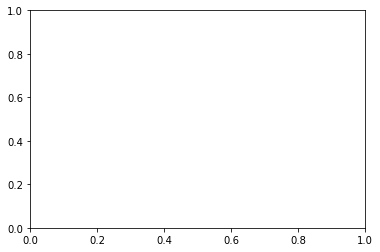

In [64]:
x = df["coord"][1]
y = df["main"][0]
df.plot(x, y, kind="scatter",title = "Latitude vs Temperature",)

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression